# Sigmoid class

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [13]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b = None
  
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0 / (1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y - y_pred) * (1 - y_pred) * y_pred * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y - y_pred) * (1 - y_pred) * y_pred
  
  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = False):
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 1

    if display_loss:
      loss = {}

    for i in range(epochs):
      dw, db = 0, 0
      for x,y in zip(X, Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)

      self.w -= learning_rate * dw
      self.b -= learning_rate * db
    
    if display_loss:
      y_pred = self.sigmoid(self.perceptron(X))
      loss[i] = mean_squared_error(y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlable('Epochs')
      plt.ylable('Mean Square Error')
      plt.show()
    
  def predict(self, X):
    y_pred = []
    for x in X:
      res = self.sigmoid(self.perceptron(x))
      y_pred.append(res)
    return np.array(y_pred)


In [14]:
sn = SigmoidNeuron()
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 1, 0, 0, 0]
sn.fit(X, Y, 1, 1)


In [15]:
my_cmap = clr.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

In [16]:
def plot_sn(X, Y, sn, ax):
  x1 = np.linspace(-10, 10, 100)
  x2 = np.linspace(-10, 10, 100)
  X1, X2 = np.meshgrid(x1, x2)
  YY = np.zeros(X1.shape)
  for i in range(x2.size):
    for j in range(x1.size):
      val = np.asarray([x1[j], x2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))

  ax.contourf(X1, X2, YY, cmap = my_cmap, alpha = 0.6)
  ax.scatter(X[:, 0], X[:, 1], cmap = my_cmap)
  ax.plot()

[[0.80362594 0.01484818]] [1.06110662]
[[1.10844262 0.07370062]] [1.08804962]
[[1.34574817 0.21325606]] [1.08102449]
[[1.50492417 0.35738755]] [1.03426946]
[[1.59477433 0.54957559]] [0.95993024]
[[1.61424172 0.92481601]] [0.82700998]
[[1.62628544 1.40524928]] [0.64519874]
[[1.79250145 1.44989463]] [0.54769155]
[[1.89107864 1.5118844 ]] [0.47670301]
[[1.96637308 1.56466784]] [0.42044891]
[[2.02797965 1.60932884]] [0.37386336]
[[2.08026429 1.64779974]] [0.33410858]
[[2.12572665 1.68152216]] [0.29943512]
[[2.16596162 1.7115166 ]] [0.26868918]
[[2.20205691 1.73851602]] [0.24106993]
[[2.23479004 1.76306018]] [0.21599895]
[[2.26473704 1.78555652]] [0.19304482]
[[2.29233694 1.80631953]] [0.17187722]
[[2.31793218 1.82559677]] [0.15223761]
[[2.34179517 1.8435865 ]] [0.13391984]


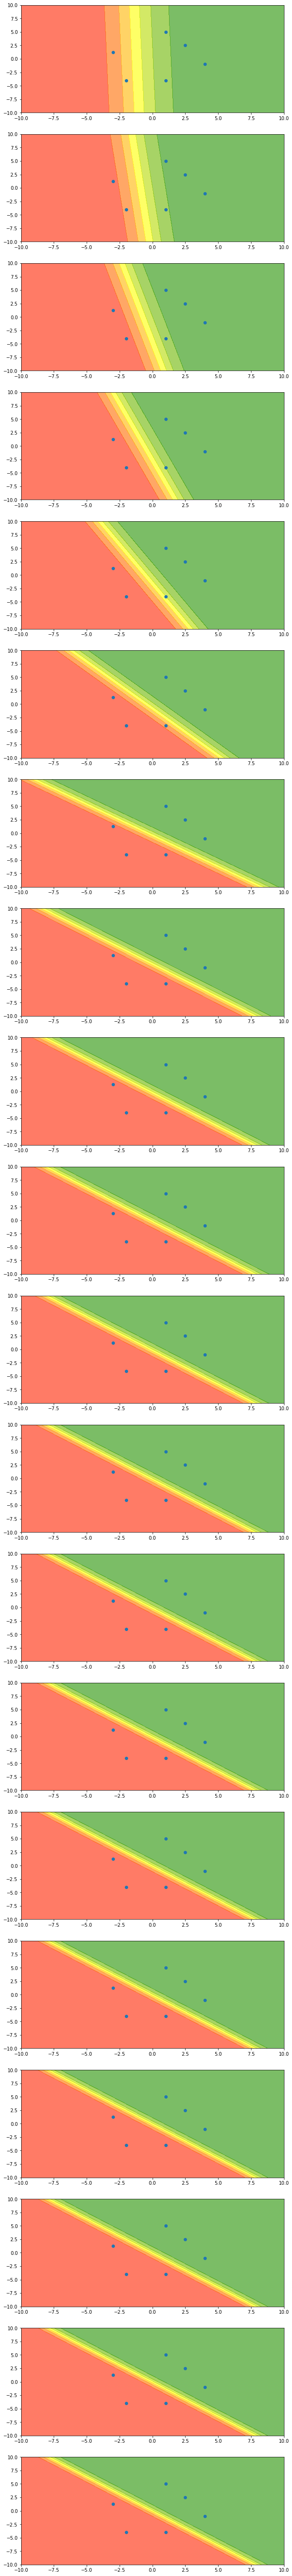

In [17]:
sn.fit(X, Y, 1, 1, True)
N = 20
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i+1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 1, False)

# Load data

In [21]:
data = pd.read_csv('mobile_cleaned.csv', error_bad_lines= False)
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [22]:
data.tail()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
336,465,220,5.0,141,1,1.2,67.20,142.7,16,2420,...,0,0,0,1,0,0,0,0,1,3.8
337,466,401,5.5,165,4,1.8,69.95,156.5,64,3000,...,0,0,0,1,0,0,0,0,1,3.9
338,468,282,5.2,160,3,1.4,68.52,149.7,16,3000,...,0,0,0,1,0,0,0,0,1,4.1
339,470,218,4.5,156,1,1.3,63.93,132.0,8,1800,...,0,0,0,1,0,0,0,0,1,3.6
340,472,401,5.5,153,3,1.8,74.21,151.1,32,3000,...,0,0,0,1,0,0,0,0,1,4.3


In [23]:
data.shape

(341, 88)

In [24]:
X = data.drop('Rating', axis = 1)
Y = data['Rating'].values

In [25]:
X.head()
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [26]:
threshold = 4.2
data['class'] = (data['Rating'] >= threshold)

In [27]:
data['class'].value_counts(normalize = True)
Y_binarized = data['class'].values

# Standardisation

In [28]:
R = np.random.random([100, 1])

In [29]:
scaler = StandardScaler()
scaler.fit(R)
RT = scaler.transform(R)

In [30]:
np.mean(RT)

-1.38222766565832e-16

In [31]:
np.std(RT)

0.9999999999999998

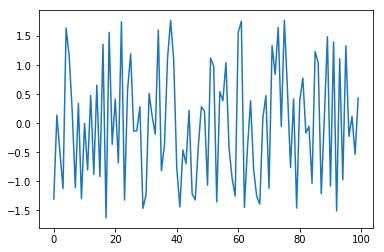

In [32]:
plt.plot(RT)
plt.show()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify = Y_binarized, random_state = 0)

In [34]:
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [35]:
print(x_train.shape, x_test.shape)

(255, 87) (86, 87)


In [36]:
minmax_scaler = MinMaxScaler()


In [37]:
y_scaled_train = minmax_scaler.fit_transform(y_train.reshape(-1,1))
y_scaled_test = minmax_scaler.transform(y_test.reshape(-1,1))
threshold_scaled = minmax_scaler.transform(np.asarray([threshold]).reshape(-1,1))

In [38]:
print(min(y_scaled_test))

[0.12]


In [39]:
threshold_scaled

array([[0.68]])

In [40]:
y_binarised_train = (y_scaled_train > threshold_scaled).astype("int")
y_binarised_test = (y_scaled_test > threshold_scaled).astype("int")

In [41]:
sn = SigmoidNeuron()

In [42]:
sn.fit(x_scaled_train, y_scaled_train, 500, 0.01, True)

In [43]:
y_pred_train = sn.predict(x_scaled_train)
y_pred_test = sn.predict(x_scaled_test)

In [44]:
y_pred_binarised_train = (y_pred_train > threshold_scaled).astype("int")
y_pred_binarised_test = (y_pred_test > threshold_scaled).astype("int")

In [45]:
accuracy_train = accuracy_score(y_pred_binarised_train, y_binarised_train)
accuracy_test = accuracy_score(y_pred_binarised_test, y_binarised_test)

In [46]:
print(accuracy_train, accuracy_test)

0.27058823529411763 0.3372093023255814
